### Solving Aiyagari (1994) model
#### 07/2019

#### Calibrating the Markov process


We need to calibrate the markov process so that:

\begin{equation}
\begin{bmatrix}
e & u
\end{bmatrix}
\begin{bmatrix}
\pi_{ee} & \pi_{eu} \\
\pi_{ue} & \pi_{uu}
\end{bmatrix} = \begin{bmatrix}
e & u
\end{bmatrix}
\end{equation}

with $e = 0.9 \text{ and } \pi_{ee} = 0.9$

We get that:
\begin{equation}
\begin{bmatrix}
\pi_{ee} & \pi_{eu} \\
\pi_{ue} & \pi_{uu}
\end{bmatrix} = \begin{bmatrix}
0.9 & 0.1 \\
0.9 & 0.1
\end{bmatrix}
\end{equation}

In [39]:
import numpy as np
from scipy import interpolate
import numba as nb

#Economic parameters
Π = np.array([[0.9,0.1], [0.9, 0.1]] )
Uss = 0.1
α = 0.36
β = 0.96
δ = 0.06



# Basic functions

# Return on capital
rf = lambda k,u: α*k**(α - 1) * (1 - u)** (1 - α )


# Return on labor
wf = lambda k,u: (1-α)*k**(α ) * (1 - u)** (- α )


#Aggregate labor supply
Lf = lambda u: 1 - u


#Utility
def u(c):
    return np.log(c)


# Interpolant to evaluate Value Function
def interpolant(x,Kgrid,Vp):
    t = interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)


def Bellman(Kp, *args):
    R, W, Kgrid, Vp, Ε, j, l, Π = args
    
    Today = u(R* Kgrid[j] + W*Ε[l] + (1 - δ) * Kgrid[j] - Kp)
#     print("Value for Today", Today)
    exp= 0
    for i in range(Nϵ):
        exp +=  Π[l,i]*interpolant(Kp,Kgrid,Vp[:,i])  
    
    Value = Today + β * exp
    
    if R* Kgrid[j] + W*Ε[l] + (1 - δ) * Kgrid[j] - Kp < 0:
        Value = - 5000000000
        
    return - Value



def simulate(Kp, simuT, Π, Kstar, Kgrid):

    np.random.seed(seed=13)
    ϵ = np.random.binomial(1, Π[0,1], simuT)
    Ksimu = np.zeros([simuT])
    
    Ksimu[0] = Kstar*3

    for t in range(1,simuT):
        print("K simulated",Ksimu[t-1])
        Ksimu[t] = interpolant(Ksimu[t-1], Kgrid, Kp[:,ϵ[t]])
        if Ksimu[t] < 0:
            Ksimu[t] = 0
        
        
    
    Kstar_new = np.mean(Ksimu[500:])
    
    return Kstar_new
    


#### Compute the steady state equilibrium for K

Error term for the Value Function:  14000.830146831844


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_lau

Error term for the Value Function:  620.8856546795104


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log


Error term for the Value Function:  203.92925034033487
Error term for the Value Function:  130.9563572863872
Error term for the Value Function:  110.6723233625069
Error term for the Value Function:  101.54528032612997
Error term for the Value Function:  93.58412319176311
Error term for the Value Function:  86.24712106758497
Error term for the Value Function:  79.4853401978411
Error term for the Value Function:  73.25368321964179
Error term for the Value Function:  67.51058840857982
Error term for the Value Function:  62.21775248002716
Error term for the Value Function:  57.33987512731411
Error term for the Value Function:  52.84442358823903
Error term for the Value Function:  48.70141566956487
Error term for the Value Function:  44.88321978239091
Error term for the Value Function:  41.36437065476054
Error term for the Value Function:  38.12139949239474
Error term for the Value Function:  35.132677454832496
Error term for the Value Function:  32.378271403034404
Error term for the Value 

Error term for the Value Function:  0.0006224834463184723
Error term for the Value Function:  0.0005736660775715573
Error term for the Value Function:  0.000528676595487711
Error term for the Value Function:  0.00048721486879388
Error term for the Value Function:  0.00044900429753578944
Error term for the Value Function:  0.00041378996819975016
Error term for the Value Function:  0.00038133695343876465
Error term for the Value Function:  0.00035142874512324987
Error term for the Value Function:  0.0003238658102251231
Error term for the Value Function:  0.0002984642599227482
Error term for the Value Function:  0.0002750546230831103
Error term for the Value Function:  0.00025348071588143
Error term for the Value Function:  0.00023359860003866476
Error term for the Value Function:  0.00021527562275159488
Error term for the Value Function:  0.00019838953186418744
Error term for the Value Function:  0.0001828276604268356
Error term for the Value Function:  0.00016848617520844134
Error term 

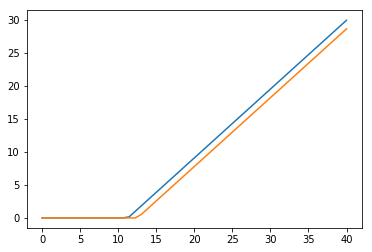

Value Function [[41.48403984 41.38420445]
 [41.54915865 41.44932326]
 [41.61427745 41.51444206]
 [41.67939626 41.57956087]
 [41.74451506 41.64467968]
 [41.80963387 41.70979848]
 [41.87475267 41.77491729]
 [41.93987148 41.84003609]
 [42.00499029 41.9051549 ]
 [42.0701091  41.97027371]
 [42.1352279  42.03539251]
 [42.20034671 42.10051132]
 [42.26546551 42.16563012]
 [42.33058432 42.23074893]
 [42.39570312 42.29586774]
 [42.46082193 42.36098654]
 [42.52594074 42.42610535]
 [42.59105954 42.49122415]
 [42.65617834 42.55634296]
 [42.72129715 42.62146176]
 [42.78641595 42.68658057]
 [42.85153475 42.75169937]
 [42.91665356 42.81681817]
 [42.98177236 42.88193698]
 [43.04689117 42.94705578]
 [43.11200997 43.01217459]
 [43.17712877 43.07729339]
 [43.24224758 43.14241219]
 [43.30736638 43.20753099]
 [43.37248518 43.2726498 ]
 [43.43760399 43.3377686 ]
 [43.50272279 43.40288741]
 [43.56784159 43.46800621]
 [43.63296039 43.53312501]
 [43.69807919 43.59824381]
 [43.763198   43.6633626 ]
 [43.8283168 

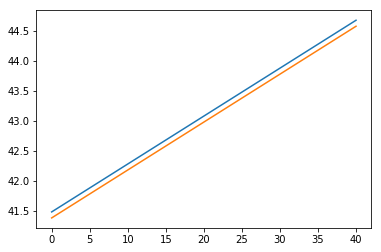

K simulated 19.47017626001869
K simulated 8.529538401895161
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in subtract
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:610: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


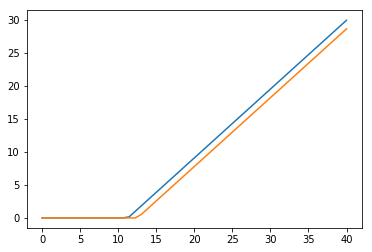

Value Function [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]


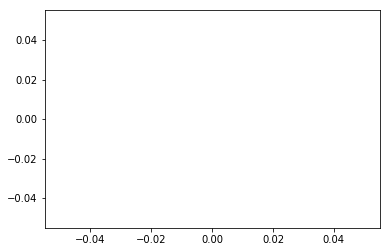

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simulated 0.0
K simula

In [40]:
from scipy.optimize import minimize
from matplotlib import pyplot as plt


# Computational parameters
N = 50
Nϵ = 2
epsi = 1
epsi2 = 1
tol = 1e-6
maxiter = 2000
simuT = 10000


# Make grid
Klow   = 0.01
Khigh  = 40
Kgrid = np.linspace(Klow, Khigh, N)

#Steady State capital
Kstar = ( (1/β - 1+δ) /(α*(1-Uss)**(1-α))) ** (1 / (α - 1))
Ustar = Uss
Ε = np.array([1,0])


iter  = 0
iter2 = 0
Vp=0*np.ones([N,Nϵ])
Kp= Klow*np.ones([N,Nϵ])
Vp_new=np.zeros([N,Nϵ])
Kp_new=np.zeros([N,Nϵ])



while (epsi2 > tol) & (iter2 < maxiter):
    epsi = 1
    iter = 0
    # Dynamic Programming Step
    ##########################
    R = rf(Kstar, Ustar)
#     print("Return ", R)
    W = wf(Kstar, Ustar)
#     print("Wage ", W)
    
    while (epsi > tol) & (iter < maxiter):
    
        for j in range(N):

            for l in range(Nϵ):

                params = R, W, Kgrid, Vp, Ε, j, l, Π
                solve = minimize(Bellman,Kp[j,l], args=(params))
                Kp_new[j,l] = solve.x
                Vp_new[j,l] = - solve.fun
                

        epsi = ((Vp_new - Vp) ** 2).sum()
        print("Error term for the Value Function: ", epsi)
        #Update
        Kp=Kp_new*1.
        Vp = Vp_new*1.
        
        iter=iter+1
    Kp_new[Kp_new < 0]  = 0
    print("Policy Function",Kp_new)
    plt.plot(Kgrid, Kp_new[:,0])
    plt.plot(Kgrid, Kp_new[:,1])
    plt.show()
    print("Value Function",Vp_new)
    plt.plot(Kgrid, Vp_new[:,0])
    plt.plot(Kgrid, Vp_new[:,1])
    plt.show()
    
    # Simulation step
    #################
    Kstar_new = simulate(Kp, simuT, Π, Kstar, Kgrid)
    print("New value for Kstar", Kstar_new)
    epsi2 = (Kstar_new - Kstar) ** 2
    print("Error term for K*: ", epsi)
    Kstar = Kstar_new
        
    iter2=iter2+1


    

In [ ]:
print(Π[1,0])

In [ ]:
print(Kstar)

In [7]:
print(Ksimu)

[-1.86234901e+180              inf             -inf ...  0.00000000e+000
  0.00000000e+000  0.00000000e+000]
